In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import mlflow 
from mlflow.models import infer_signature


sns.set_theme()
sns.set_context("paper")

warnings.filterwarnings("ignore")

In [207]:
!pip install mlflow

  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.3-py2.py3-none-any.whl.metadata (7.7 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl.metadata (559 bytes)
  Using cached waitress-3.0.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached Mako-1.3.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached graphql_core-3.2.3-py3-none-any.whl.metadata (10 kB)
  Using cached graphql_relay-3.2.0-py3-none-any.whl.metadata (12 kB)
  Using cached aniso8601-9.0.1-py2.py3-none-any.whl.metadata (23 kB)
  Using cached Deprecated-1.2.14-py2.py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/26.3 MB ? eta -:--:--
    --------------------------------------- 0.4/26.3 MB 11.2 MB/s eta 0:00:03
   - -------------------------------------- 0.7/26.3 MB 9.2 MB/s eta 0:00:03
   - -------------------------------------- 1.0/26.3 MB 8.1 MB/s eta 0:00:04
   - -------------------------------------- 1.3/26.3 MB 7.4 MB/s eta 0:00:04
   --

In [75]:
data= pd.read_csv("Insurance claims data.csv")

In [76]:
data.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [79]:
data.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

In [81]:
data.dtypes

policy_id                            object
subscription_length                 float64
vehicle_age                         float64
customer_age                          int64
region_code                          object
region_density                        int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
steering_type                   

In [83]:
data.describe()

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,gross_weight,ncap_rating,claim_status
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.111688,1.388473,44.823935,18826.858667,3.137066,1162.355851,3.626963,4.852893,3850.476891,1672.233667,1385.276813,1.759950,0.063968
std,4.142790,1.134413,6.935604,17660.174792,1.832641,266.304786,0.483616,0.228061,311.457119,112.089135,212.423085,1.389576,0.244698
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,4.500000,3445.000000,1475.000000,1051.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,4.600000,3445.000000,1515.000000,1185.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,4.800000,3845.000000,1735.000000,1335.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1510.000000,3.000000,0.000000
max,14.000000,20.000000,75.000000,73430.000000,6.000000,1498.000000,4.000000,5.200000,4300.000000,1811.000000,1720.000000,5.000000,1.000000


 ### Exploratory Data Analysis (EDA)

In [85]:
# creating a claim status 
data['claim_status_text']= data["claim_status"].map({1:'Yes', 0:'No'})

In [87]:
data.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status,claim_status_text
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0,No
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0,No
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0,No
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,Yes,No,No,No,Yes,0,0,No
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,Yes,Yes,Yes,No,No,Yes,Yes,5,0,No


In [89]:
# bin customer subscription_length
bins= [0,3,8,10,14]
group=['New members','Recent members','Regular members','Golden members']
data['Members_binned']= pd.cut(data['subscription_length'],bins,labels=group,include_lowest=True)

In [91]:
# bin vehicle_age
bins= [0,3,8,13,20]
group=['New Cars','Recent Cars','Regular Cars','Golden Cars']
data['vehicle_age_binned']= pd.cut(data['vehicle_age'],bins,labels=group,include_lowest=True)

In [93]:
# bin customer age
bins= [0,18,45,60,75]
group=['0-17','18-45','45-60','61+']
data['customers_age_binned']= pd.cut(data['customer_age'],bins,labels=group,include_lowest=True)

In [24]:
data.customers_age_binned.value_counts()

customers_age_binned
18-45    34822
45-60    22264
61+       1506
0-17         0
Name: count, dtype: int64

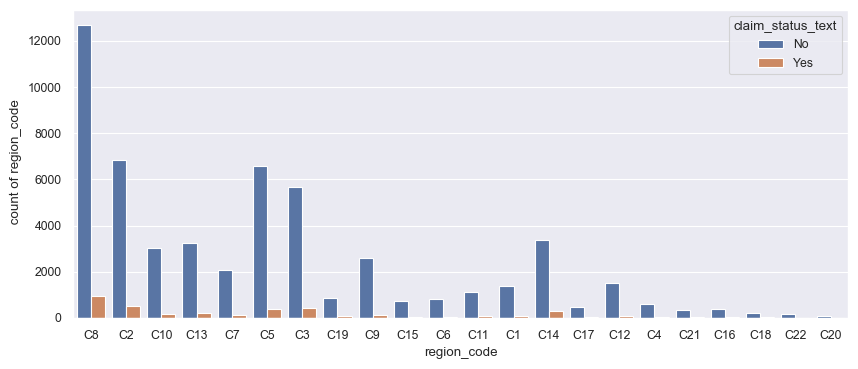

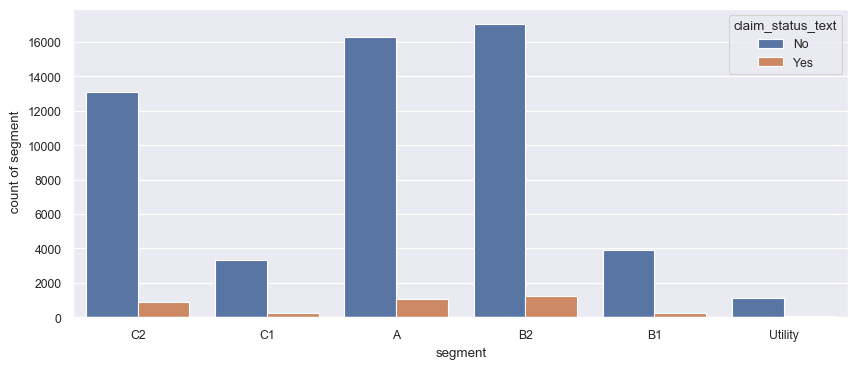

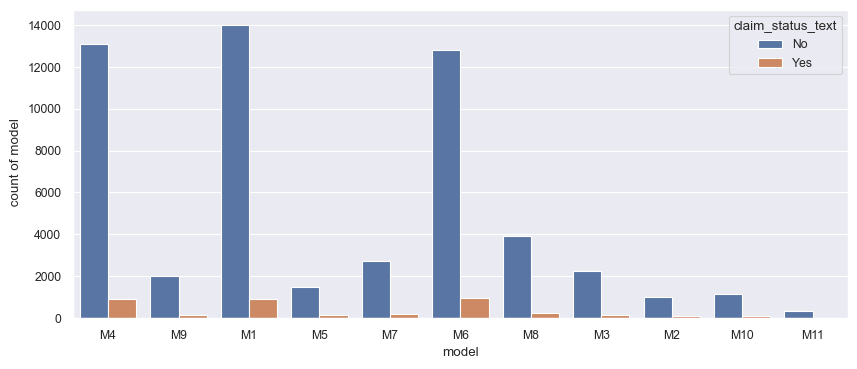

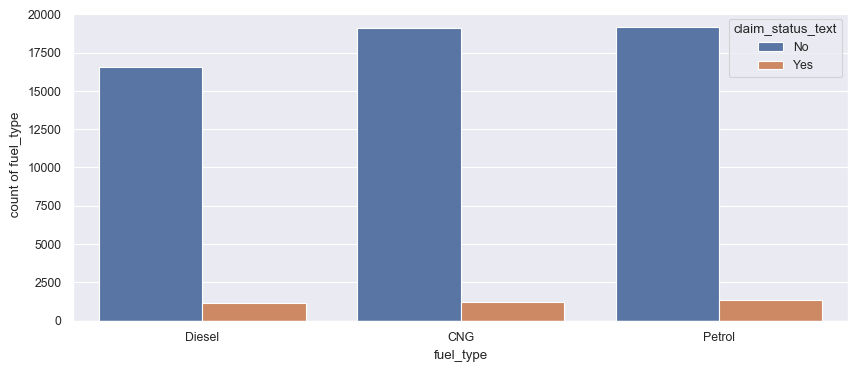

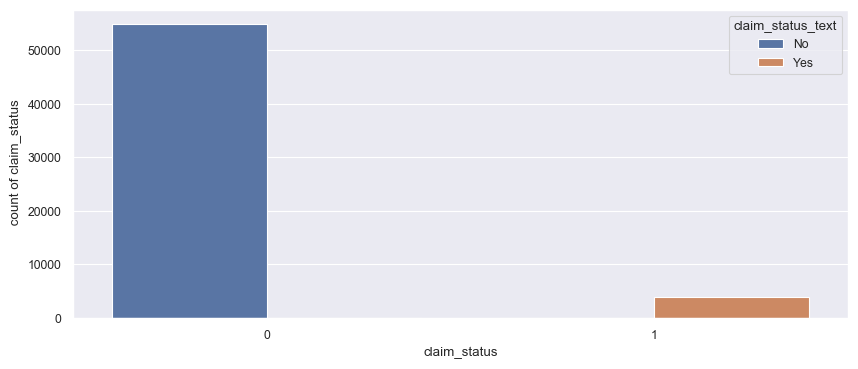

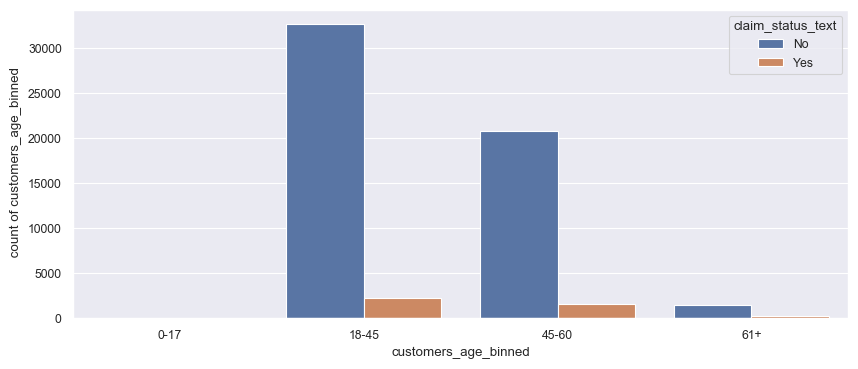

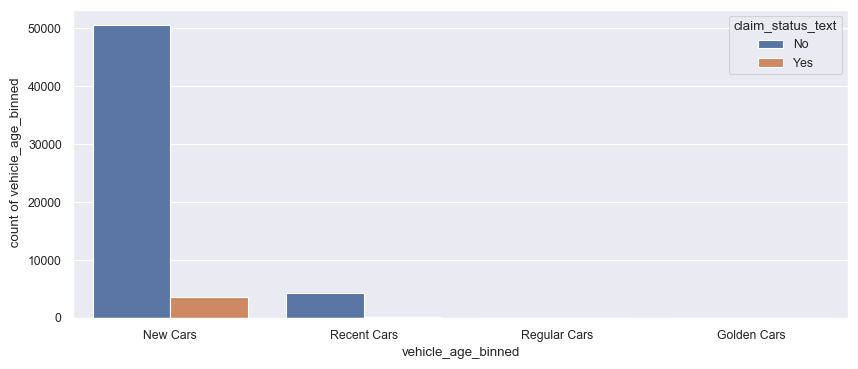

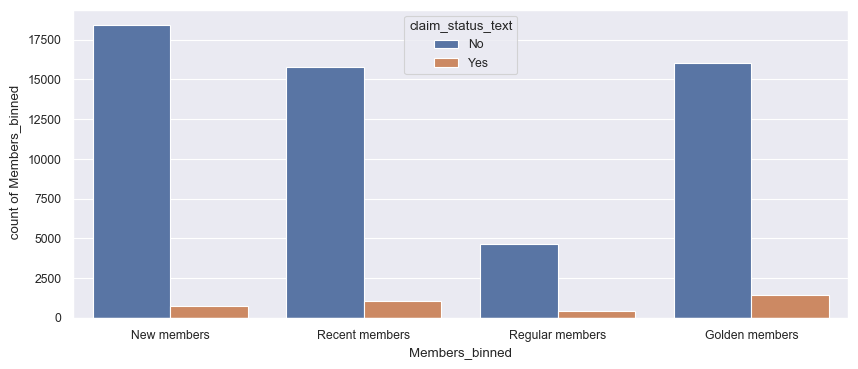

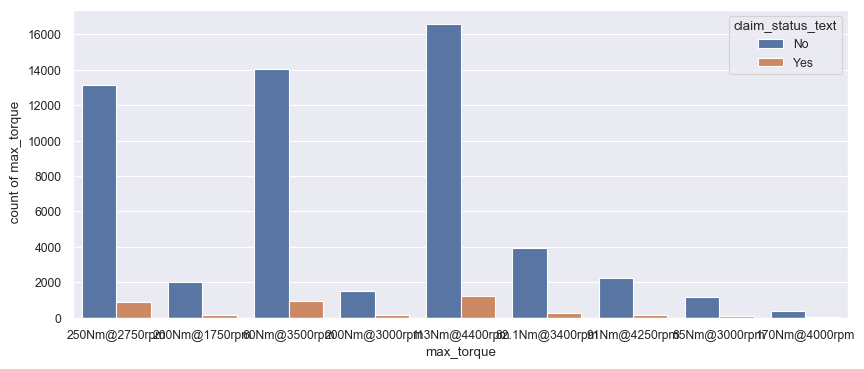

In [28]:
categorical_eda= ['region_code','segment','model','fuel_type','claim_status','customers_age_binned','vehicle_age_binned','Members_binned','max_torque']
for i in categorical_eda:
    fig=plt.figure(figsize= (10,4))
    sns.countplot(data=data, x= i, hue="claim_status_text")
    plt.xlabel(i)
    plt.ylabel(f' count of {i}')
    plt.show()

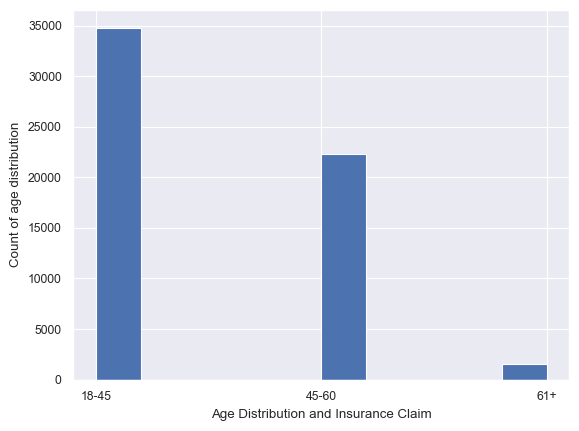

In [29]:
plt.hist(data=data, x="customers_age_binned")
plt.xlabel("Age Distribution and Insurance Claim")
plt.ylabel("Count of age distribution")
plt.show()

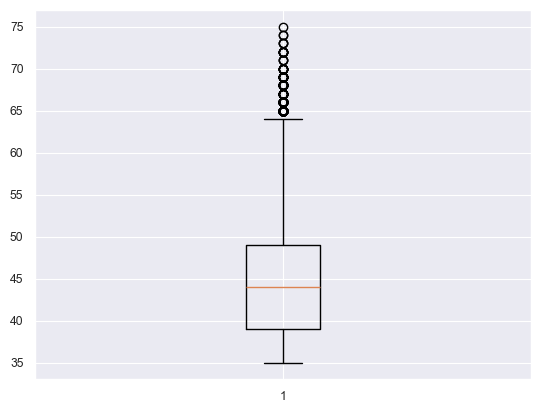

In [30]:
boxplot= ['customer_age','']
plt.boxplot(x='customer_age',data=data)
plt.show()

In [34]:
claim = 1
claim_insurance= len(data[data["claim_status"] == claim])
per_of_claim= (claim_insurance / len(data)) * 100
print(f" Percentage of Insurance claim made is{per_of_claim: .2f}%")

 Percentage of Insurance claim made is 6.40%


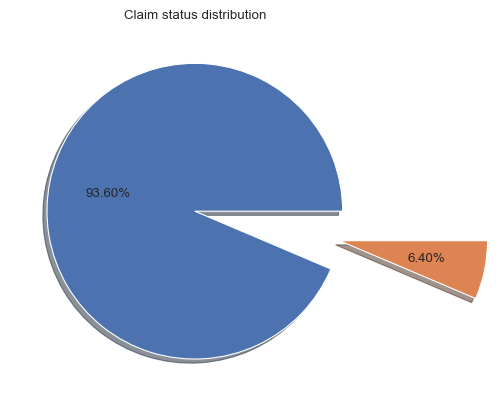

In [36]:
fig, ax=plt.subplots()
size=data["claim_status"].value_counts()
labels=size.index
ax.pie(size,labels,autopct='%1.2f%%',shadow=True)
plt.title("Claim status distribution")
plt.show()

### Test of Hypothesis Using Chi-square

In [89]:
# create contigrncy table between two observed variables 
stats_list=["fuel_type","region_code","cylinder","steering_type","model","airbags","engine_type","is_brake_assist"]
for i in stats_list:
    contingency_table= pd.crosstab(data[i], data["claim_status_text"])
    print(contingency_table)
    #perform chi-square test of Independence 
    chi2,p,dof,expected =chi2_contingency(contigency_table)

    print(f"Chi-square statistics: {chi2}")
    print(f"P-Values: {p}")
    print(f"Degree of Freedom: {dof}")
    print("Expected Frequencies")
    print(expected)


    alpha= 0.05

    if p <= alpha:
        print(f"Reject the null hypothesis: There is an association between {i} type and claim status")
    else:
        print(f"Fail to reject the null hypothesis: No association between {i} and claim status\n")

claim_status_text     No   Yes
fuel_type                     
CNG                19095  1235
Diesel             16580  1150
Petrol             19169  1363
Chi-square statistics: 5.759623054808867
P-Values: 0.056145343695656484
Degree of Freedom: 2
Expected Frequencies
[[19029.53509011  1300.46490989]
 [16595.85131076  1134.14868924]
 [19218.61359913  1313.38640087]]
Fail to reject the null hypothesis: No association between fuel_type and claim status

claim_status_text     No  Yes
region_code                  
C1                  1392   76
C10                 3007  148
C11                 1140   72
C12                 1502   87
C13                 3228  195
C14                 3379  281
C15                  733   38
C16                  378   23
C17                  473   19
C18                  216   26
C19                  881   71
C2                  6822  520
C20                  104    5
C21                  350   29
C22                  190   17
C3                  5668  433
C4  

In [193]:
from scipy.stats import mannwhitneyu

# Split the data into two groups based on the claim status
age_yes = data[data['claim_status_text'] == 'Yes']['vehicle_age']
age_no = data[data['claim_status_text'] == 'No']['vehicle_age']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(age_yes, age_no)

print(f"U-Statistic: {u_stat}")
print(f"P-Value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in car age between claim and no claim groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in car age between claim and no claim groups.")


U-Statistic: 95987705.0
P-Value: 1.0997711491797156e-11
Reject the null hypothesis: There is a significant difference in car age between claim and no claim groups.


### Encoding Categorical variable 

In [95]:
# function to encode categorrical variabe
def car(x):
    if x == "No":
        return 0
    else : 
        return 1

In [97]:
category= ["is_esc","is_adjustable_steering","is_power_door_locks","is_parking_sensors",
           "is_parking_camera","rear_brakes_type","is_front_fog_lights","is_rear_window_wiper","is_rear_window_washer","is_tpms",
           'is_rear_window_defogger', 'is_brake_assist','is_power_door_locks',"is_central_locking","is_power_steering","is_driver_seat_height_adjustable",
           "is_day_night_rear_view_mirror","is_ecw","is_speed_alert"]

for i in category:
    data[i]=data[i].apply(car)

In [99]:
data.dtypes

policy_id                             object
subscription_length                  float64
vehicle_age                          float64
customer_age                           int64
region_code                           object
region_density                         int64
segment                               object
model                                 object
fuel_type                             object
max_torque                            object
max_power                             object
engine_type                           object
airbags                                int64
is_esc                                 int64
is_adjustable_steering                 int64
is_tpms                                int64
is_parking_sensors                     int64
is_parking_camera                      int64
rear_brakes_type                       int64
displacement                           int64
cylinder                               int64
transmission_type                     object
steering_t

### Feature Engineering

In [ ]:
fe_encode=["segment","model","fuel_type","max_torque","max_power","engine_type","transmission_type","steering_type"]
for i in fe_encode:
    data[i]=le.fit_transform(data[i])

In [101]:
column=["segment","model","fuel_type","max_torque","max_power","engine_type","transmission_type","steering_type"]
for i in column:
    data_encoded=pd.get_dummies(data,columns=column,drop_first=False)

for col in data_encoded.columns:
    if data_encoded[col].dtype == bool:
        data_encoded[col] = data_encoded[col].astype(int)


In [105]:
data_encoded

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,airbags,is_esc,is_adjustable_steering,is_tpms,...,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Manual,steering_type_Power
0,POL045360,9.3,1.2,41,C8,8794,6,1,1,1,...,0,0,0,0,0,1,0,0,0,1
1,POL016745,8.2,1.8,35,C2,27003,2,0,1,0,...,0,0,0,0,1,0,1,1,0,0
2,POL007194,9.5,0.2,44,C8,8794,6,1,1,1,...,0,0,0,0,0,1,0,0,0,1
3,POL018146,5.2,0.4,44,C10,73430,2,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,POL049011,10.1,1.0,56,C13,5410,2,0,1,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,POL019269,10.6,2.6,48,C5,34738,2,0,1,0,...,0,0,1,0,0,0,1,1,0,0
58588,POL001254,2.3,2.2,37,C3,4076,6,1,1,1,...,0,0,0,0,0,1,0,0,0,1
58589,POL019859,6.6,2.2,35,C8,8794,2,0,1,0,...,0,0,1,0,0,0,1,1,0,0
58590,POL014061,4.1,3.6,44,C8,8794,2,0,1,0,...,0,0,1,0,0,0,1,1,0,0


In [113]:
## Droped columns not needed for machine learning
dropped_columns=['policy_id', 'region_code',"claim_status_text","customers_age_binned","vehicle_age_binned","Members_binned"]

data_encoded.drop(columns=dropped_columns,inplace=True)

In [119]:
data_encoded.columns

Index(['subscription_length', 'vehicle_age', 'customer_age', 'region_density',
       'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
       'displacement', 'cylinder', 'turning_radius', 'length', 'width',
       'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'claim_status', 'segment_A',
       'segment_B1', 'segment_B2', 'segment_C1', 'segment_C2',
       'segment_Utility', 'model_M1', 'model_M10', 'model_M11', 'model_M2',
       'model_M3', 'model_M4', 'model_M5', 'model_M6', 'model_M7', 'model_M8',
       'model_M9', 'fuel_type_CNG', 'fuel_type_Diesel', 'fuel_type_Petrol',
       'max_torque_113Nm@4400rpm', 'max_torq

In [121]:
X= data_encoded.drop(columns=['claim_status'])
y= data_encoded["claim_status"]

In [123]:
X

,subscription_length,vehicle_age,customer_age,region_density,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,...,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Manual,steering_type_Power
0,9.3,1.2,41,8794,6,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,1
1,8.2,1.8,35,27003,2,0,1,0,1,1,...,0,0,0,0,1,0,1,1,0,0
2,9.5,0.2,44,8794,6,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,1
3,5.2,0.4,44,73430,2,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,10.1,1.0,56,5410,2,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,10.6,2.6,48,34738,2,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0
58588,2.3,2.2,37,4076,6,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,1
58589,6.6,2.2,35,8794,2,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0
58590,4.1,3.6,44,8794,2,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0


In [131]:
X_train_scaled.shape

(38084, 84)

### Model Trainig and Tracking with Mlflow

In [227]:
# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")
 

Test set accuracy: 0.57
              precision    recall  f1-score   support

           0       0.96      0.56      0.71     19185
           1       0.09      0.65      0.16      1323

    accuracy                           0.57     20508
   macro avg       0.53      0.60      0.43     20508
weighted avg       0.90      0.57      0.67     20508

[[10759  8426]
 [  465   858]]


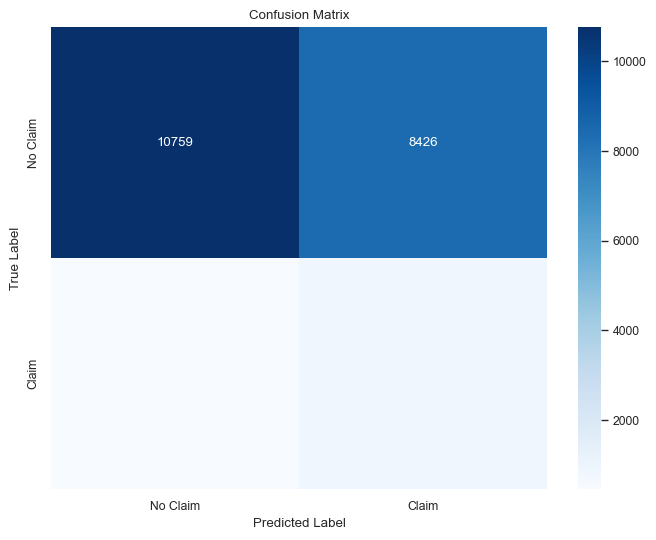

In [187]:
#test train split

X_train,X_test,y_train,y_test= train_test_split (X,y, test_size=0.35, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


parameters={class_weight:'balanced', 
            max_depth=2, 
            random_state=0}
# Initialize RandomForestClassifier with balanced class weights and other parameters
clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Claim', 'Claim'], yticklabels=['No Claim', 'Claim'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [237]:
# Create a new MLflow Experiment
mlflow.set_experiment("Insurance Claim")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(parameters)

    # Log the loss metric
    mlflow.log_metric("accuracy", accuracy)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "RF without smote model for insurance claim")

    # Infer the model signature
    signature = infer_signature(X_train_scaled, clf.predict(X_train_scaled))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=clf,
        artifact_path="RF Insurance claim",
        signature=signature,
        input_example=X_train,
        registered_model_name="Rf without tuning and smote",
    )


Successfully registered model 'Rf without tuning and smote'.
2024/08/06 17:31:58 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Rf without tuning and smote, version 1
Created version '1' of model 'Rf without tuning and smote'.


2024/08/06 17:35:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run selective-fawn-493 at: http://127.0.0.1:8080/#/experiments/934290203055501135/runs/67881d6476ff4f8bba5ea333d6ad82ea.
2024/08/06 17:35:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:8080/#/experiments/934290203055501135.


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     19185
           1       0.00      0.00      0.00      1323

    accuracy                           0.94     20508
   macro avg       0.47      0.50      0.48     20508
weighted avg       0.88      0.94      0.90     20508



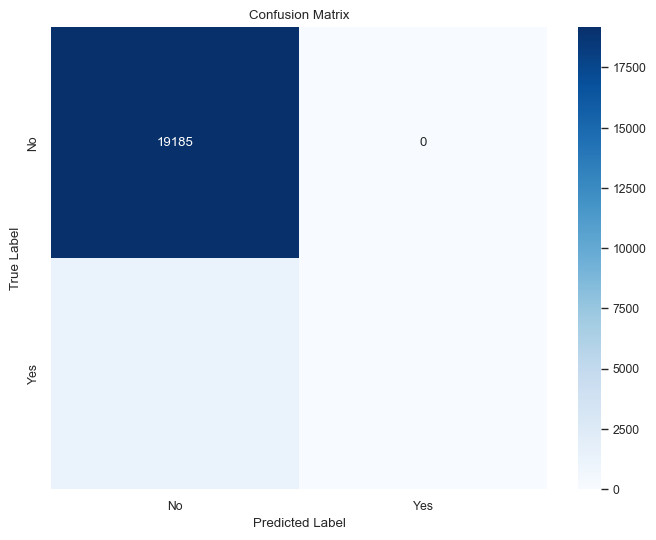

In [137]:
clf = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_clf = grid_search.best_estimator_


y_pred = best_clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
  # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2f}")

### Logging rf with paramtere tunning

In [243]:
# Create a new MLflow Experiment
mlflow.set_experiment("Insurance Claim")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(param_grid)

    # Log the loss metric
    mlflow.log_metric("accuracy", accuracy)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "RF without smote model for insurance claim")

    # Infer the model signature
    signature = infer_signature(X_train_scaled, best_clf.predict(X_train_scaled))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=clf,
        artifact_path="RF Insurance claim",
        signature=signature,
        input_example=X_train,
        registered_model_name="Rf with tuning and smote",
    )


Successfully registered model 'Rf with tuning and smote'.
2024/08/06 19:47:16 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Rf with tuning and smote, version 1
Created version '1' of model 'Rf with tuning and smote'.


2024/08/06 19:48:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run delicate-fly-516 at: http://127.0.0.1:8080/#/experiments/934290203055501135/runs/ff55662b84f54a37bb3830990781a2bd.
2024/08/06 19:48:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:8080/#/experiments/934290203055501135.


In [141]:
from imblearn.over_sampling import SMOTE

In [147]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Test set accuracy: 0.57
              precision    recall  f1-score   support

           0       0.96      0.57      0.71     19185
           1       0.09      0.62      0.16      1323

    accuracy                           0.57     20508
   macro avg       0.52      0.60      0.44     20508
weighted avg       0.90      0.57      0.68     20508

[[15475  7555]
 [20184 28104]]


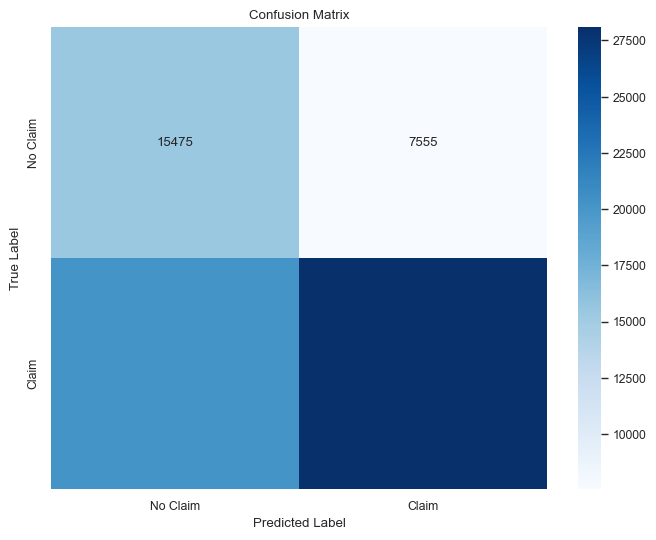

In [203]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the resampled training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialize RandomForestClassifier with balanced class weights and other parameters

clf = RandomForestClassifier(max_depth=5, random_state=42,criterion='gini')
clf.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test data
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

# Compute and print the confusion matrix
cm = confusion_matrix(y_train_pred, y_train_resampled)
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Claim', 'Claim'], yticklabels=['No Claim', 'Claim'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### RF with smote 

In [247]:
# Create a new MLflow Experiment
mlflow.set_experiment("Insurance Claim")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    parameters= {"max_depth": 5, "random_state":42,"criterion":'gini'}
    mlflow.log_params(parameters)

    # Log the loss metric
    mlflow.log_metric("accuracy", accuracy)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "RF with smote model for insurance claim")

    # Infer the model signature
    signature = infer_signature(X_train_resampled, clf.predict(X_train_resampled))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=clf,
        artifact_path="RF Insurance claim",
        signature=signature,
        input_example=X_train,
        registered_model_name="Rf with smote",
    )


Successfully registered model 'Rf with smote'.
2024/08/06 19:52:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Rf with smote, version 1
Created version '1' of model 'Rf with smote'.


2024/08/06 19:53:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run respected-hawk-73 at: http://127.0.0.1:8080/#/experiments/934290203055501135/runs/10db7ba0eb0046cb9b1238943058ae0f.
2024/08/06 19:53:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:8080/#/experiments/934290203055501135.
